In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if os.getcwd().endswith("notebooks"):
    os.chdir("..")

In [3]:
from fundus_datamodules import DDRSegmentationDataModule

dm = DDRSegmentationDataModule("data/DDR-dataset", batch_size=1, return_label=True, img_size=(1024, 1024))
dm.setup("validate")
dm.val.transform

Compose([
  FundusAutocrop(always_apply=True, p=1.0, threshold=25.0),
  LongestMaxSize(always_apply=True, p=1, max_size=1024, interpolation=1),
  PadIfNeeded(always_apply=True, p=1.0, min_height=1024, min_width=1024, pad_height_divisor=None, pad_width_divisor=None, border_mode=0, value=None, mask_value=None),
  Normalize(always_apply=True, p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


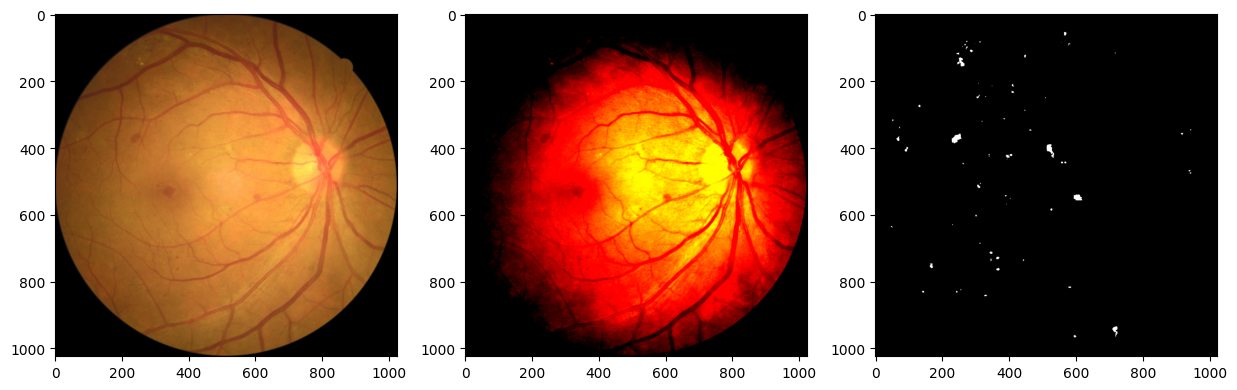

In [4]:
import matplotlib.pyplot as plt
import torch

img, mask, label = dm.val[30]

mean = torch.tensor(dm.val.transform.transforms[3].mean).view(3, 1, 1)
std = torch.tensor(dm.val.transform.transforms[3].std).view(3, 1, 1)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow((img * std + mean).permute(1, 2, 0))
ax[1].imshow(img.permute(1, 2, 0))  # Clips the dynamic range because values go beyond [0, 1] interval
ax[2].imshow(mask > 0, cmap="gray")

In [7]:
from masked_vit import make_model

model = make_model()

with torch.inference_mode():
    img, mask, label = next(iter(dm.val_dataloader()))
    model(img, mask, mode="neg_inf_replace"), label

<All keys matched successfully>


/workspaces/DRG-NET/masked-vit/src/masked_vit/masked_vit.py:59: UserWarning: mode neg_inf_replace does not work
  warnings.warn("mode neg_inf_replace does not work")
